## Notebook to explore data within the HRSID (ship segmentation) dataset (PNG version)

In [4]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

Dataset can be downloaded from [here](https://drive.google.com/file/d/1xgXi8KC3MDWuu7Yp4n2J-LOPYLRszHAc/view). It is a bit less than 7GB once extracted. For this notebook, I assume the following directory structure:
```
└───datasets
    └───HRSID
        ├───annotations
        ├───images
        └───inshore_offshore
└───dataset_exploration
    └───HRSID_exploration.ipynb
```

In [5]:
# Modify as needed
dataset_path = os.path.join(r"C:\Users", "alexm", "Senior-Design", "datasets", "HRSID")
#dataset_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "HRSID")

In [6]:
train_test_annotations_path = os.path.join(dataset_path, "annotations", "train_test2017.json")
images_path = os.path.join(dataset_path, "images")

In [7]:
with open(train_test_annotations_path) as json_data:
    data = json.load(json_data)
    image_info = data['images']
    image_annotations = data['annotations']

In [8]:
print("Number of images:", len(image_info))
print("Number of annotations", len(image_annotations))

Number of images: 5604
Number of annotations 16951


In [9]:
# Look at sample image info
for key in image_info[25].keys():
    print(key, ":", image_info[25][key])

license : 0
url : None
file_name : P0001_2400_3200_4800_5600.png
height : 800
width : 800
date_captured : None
id : 25


In [10]:
# Are all images the same resolution?:
num_diff = 0
for idx in range(len(image_info)):
    if image_info[idx]['height'] != 800 or image_info[idx]['width'] != 800:
        num_diff += 1
print("Number of non 800x800 images:", num_diff)

Number of non 800x800 images: 0


In [11]:
# Look at sample annotation
for key in image_annotations[25].keys():
    print(key, ":", image_annotations[25][key])

id : 25
image_id : 6
category_id : 1
segmentation : [[184.0, 657.0, 183.0, 658.0, 182.0, 658.0, 182.0, 659.0, 181.0, 660.0, 181.0, 661.0, 181.0, 662.0, 182.0, 663.0, 182.0, 664.0, 182.0, 665.0, 183.0, 666.0, 184.0, 667.0, 185.0, 668.0, 186.0, 669.0, 186.0, 670.0, 187.0, 671.0, 188.0, 672.0, 188.0, 673.0, 189.0, 674.0, 190.0, 675.0, 191.0, 676.0, 191.0, 677.0, 192.0, 678.0, 193.0, 679.0, 193.0, 680.0, 194.0, 681.0, 195.0, 682.0, 195.0, 683.0, 196.0, 684.0, 197.0, 685.0, 198.0, 686.0, 198.0, 687.0, 199.0, 688.0, 200.0, 689.0, 200.0, 690.0, 201.0, 691.0, 202.0, 692.0, 202.0, 693.0, 203.0, 694.0, 204.0, 695.0, 205.0, 696.0, 205.0, 697.0, 206.0, 698.0, 207.0, 699.0, 207.0, 700.0, 208.0, 701.0, 209.0, 702.0, 209.0, 703.0, 210.0, 704.0, 211.0, 705.0, 212.0, 706.0, 212.0, 707.0, 213.0, 708.0, 214.0, 708.0, 215.0, 709.0, 216.0, 709.0, 217.0, 708.0, 217.0, 707.0, 217.0, 706.0, 217.0, 705.0, 216.0, 704.0, 216.0, 703.0, 216.0, 702.0, 215.0, 701.0, 215.0, 700.0, 214.0, 699.0, 214.0, 698.0, 213.0, 6

In [12]:
# Are all the annotations for category_id=1 (ships)?
num_ones = 0
for i in range(len(image_annotations)):
    if image_annotations[i]['category_id'] == 1:
        num_ones += 1
print("Proportion of 1s:", num_ones / len(image_annotations))

Proportion of 1s: 1.0


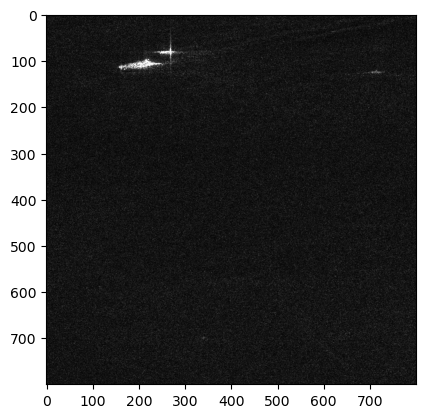

In [13]:
# View an image
img_path = os.path.join(images_path, image_info[0]['file_name'])
with Image.open(img_path) as img:
    plt.imshow(img)

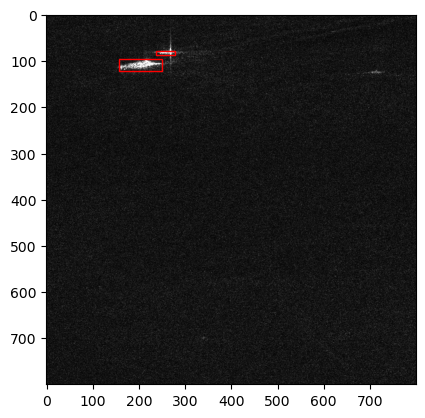

In [14]:
# Draw bounding box around the two labeled ships in the image
img_path = os.path.join(images_path, image_info[0]['file_name'])
ship1_bbox = image_annotations[0]['bbox']
ship2_bbox = image_annotations[1]['bbox']
fig, ax = plt.subplots()
with Image.open(img_path) as img:
    ax.imshow(img)
    ship1_rect = patches.Rectangle((ship1_bbox[0], ship1_bbox[1]), ship1_bbox[2], ship1_bbox[3],
                                   linewidth=1, edgecolor='r', facecolor='none')
    ship2_rect = patches.Rectangle((ship2_bbox[0], ship2_bbox[1]), ship2_bbox[2], ship2_bbox[3],
                                   linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(ship1_rect)
    ax.add_patch(ship2_rect)

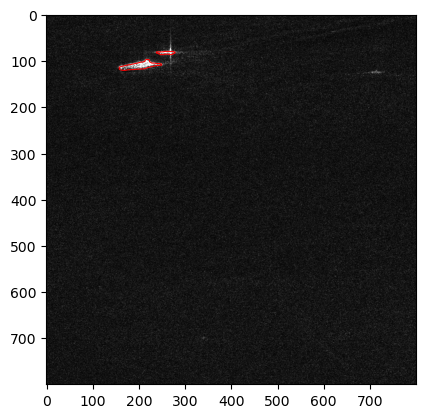

In [15]:
# Get the path to the image
img_path = os.path.join(images_path, image_info[0]['file_name'])

# Get the segmentation data for the first and second ships
ship1_segmentation = image_annotations[0]['segmentation'][0]
ship2_segmentation = image_annotations[1]['segmentation'][0]

# Create a new plot
fig, ax = plt.subplots()

# Open and display the image
with Image.open(img_path) as img:
    ax.imshow(img)

    # Reshape into (x, y) coordinate pairs
    ship1_coords = np.array(ship1_segmentation).reshape((-1, 2))
    ship2_coords = np.array(ship2_segmentation).reshape((-1, 2))

    # Create a polygon for ship1 using the segmentation data
    ship1_polygon = patches.Polygon(ship1_coords, linewidth=0.75, edgecolor='r', facecolor='none')

    # Create a polygon for ship2 using the segmentation data
    ship2_polygon = patches.Polygon(ship2_coords, linewidth=0.75, edgecolor='r', facecolor='none')

    # Add the polygons (segmentation masks?) to the plot
    ax.add_patch(ship1_polygon)
    ax.add_patch(ship2_polygon)

Split image up into patches. Will use an image with more going on for this example:

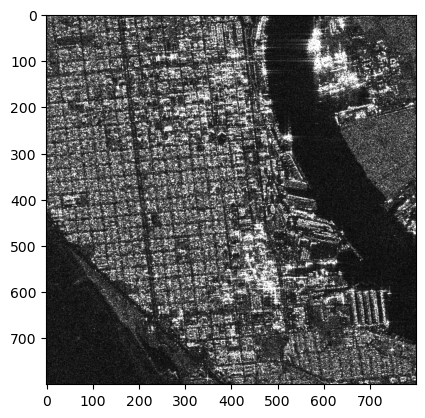

In [21]:
# First show original image
img_path = os.path.join(images_path, image_info[1]['file_name'])
fig, ax = plt.subplots()
with Image.open(img_path) as img:
    ax.imshow(img)

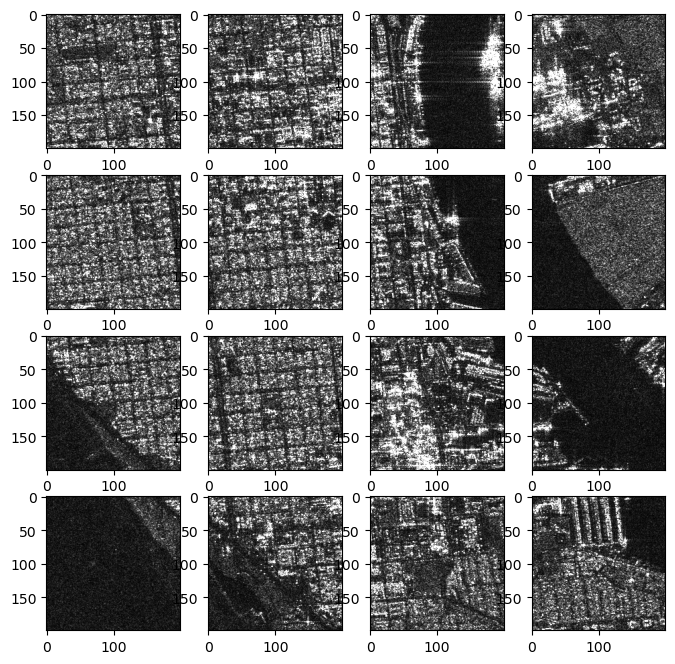

In [27]:
# Now show 200x200 patches
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
with Image.open(img_path) as img:
    for x_idx, x_start in enumerate([0, 200, 400, 600]):
        for y_idx, y_start in enumerate([0, 200, 400, 600]):
            patch = img.crop((x_start, y_start, x_start + 200, y_start + 200))
            ax[y_idx, x_idx].imshow(patch)